# Importando bibliotecas

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Criando um database

In [69]:
import os
import csv
from PIL import Image

exercicios = {}
users = []
for i in range (1,400):
    
    if i <10:
        user= "00"+ str(i)
    
    elif i<100:
        user= "0"+ str(i)
        
    else:
        user=str(i)
        

    path = 'backup/user_' + user
    
    users.append(path)
    
    
    data=[]
    for filename in os.listdir(path):
        data.append(filename)
        #writer.writerow(data)
    exercicios[int(user)]=data
    data=[]


In [70]:
dict={}
lista=[]
for k in exercicios.keys():
    exs={}
    for l in exercicios[k]:
            p=l.find('_')
            numero=int(l[2:p])          
            if numero not in exs:
                exs[numero] = 1
                lista.append(numero)
            else:
                exs[numero] += 1
    dict[k]=exs

In [71]:
from collections import OrderedDict 
dict1 = OrderedDict(sorted(dict.items())) 


In [72]:
dados = pd.DataFrame.from_dict(dict1) 


In [73]:
dados=dados.T

In [82]:
df = dados.reindex(columns=sorted(dados.columns))


In [85]:
df=df.fillna(0)


In [86]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
1,1.0,1.0,7.0,3.0,21.0,2.0,14.0,4.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,15.0,5.0,2.0,6.0,2.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,5.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise exploratória - exercício 3

In [123]:
exercicio3=df[3]
total = exercicio3.count()
naoFeito = exercicio3.isna().sum()
feito=total-naoFeito
naoFeito

0

In [124]:
tentativas_ex3 = exercicio3.value_counts()

total_tentativas=tentativas_ex3.sum()
naoFeitos_ex3 = tentativas_ex3[0]

feitos=total-naoFeitos_ex3
feitos

319

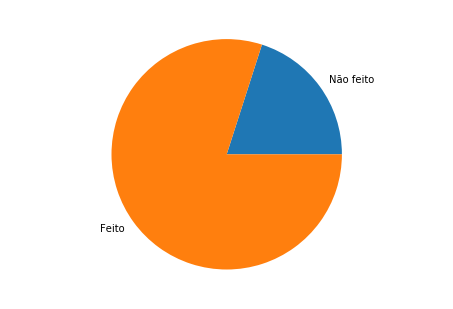

In [125]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie((naoFeitos_ex3,feitos), labels = ('Não feito', 'Feito'))
plt.show()

Text(0, 0.5, 'Alunos')

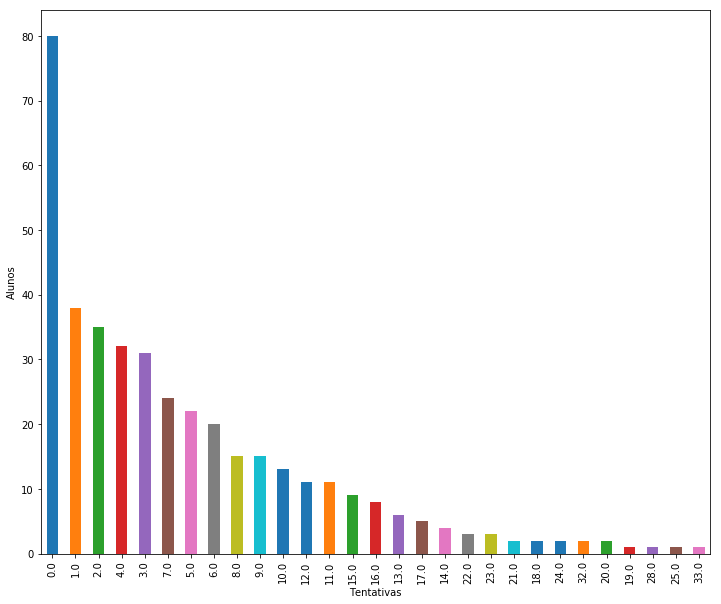

In [126]:
fig=plt.figure(figsize=(12,10))
tentativas_ex3.plot(kind='bar',  legend=False)
plt.xlabel('Tentativas')
plt.ylabel('Alunos')
